In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere, plot_bloch_vector
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.quantum_info import Statevector

import numpy as np

In [2]:
sim = Aer.get_backend('aer_simulator')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
# 3-bit code

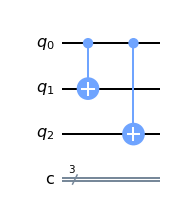

In [8]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc_3qx = QuantumCircuit(qreg_q, creg_c)
### your code goes here. ###
qc_3qx.cx(qreg_q[0], qreg_q[1])
qc_3qx.cx(qreg_q[0], qreg_q[2])

#######
qc_3qx.draw('mpl')

In [4]:
def apply_err(n, err):
    
    qc = QuantumCircuit(int(n), name='Error')
    which_qubit = np.random.randint(n)
    
    if err=='bit':
        qc.x(which_qubit)
    elif err=='phase':
        qc.z(which_qubit)
    else:
        pass
    
    err = qc.to_gate()
    
    return err, which_qubit

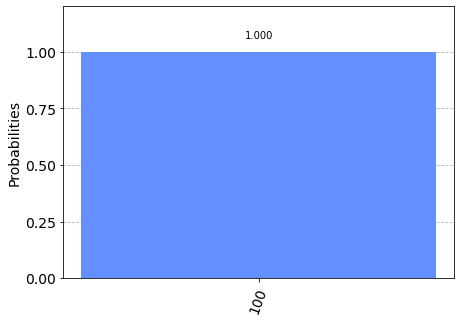

In [15]:
# Introduce the bit flip error

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc_3qx = QuantumCircuit(qreg_q, creg_c)
### your code goes here. ###
qc_3qx.cx(qreg_q[0], qreg_q[1])
qc_3qx.cx(qreg_q[0], qreg_q[2])

#######
err, which_qubit = apply_err(3, 'bit')
qc_3qx.append(err,range(3))
qc_3qx.measure([0,1,2],[0,1,2])
qc_3qx.draw('mpl')


######
qc_3qx_trans = transpile(qc_3qx, sim)
counts = sim.run(qc_3qx_trans).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

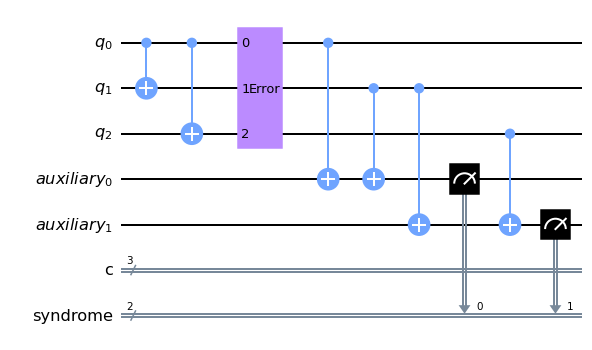

In [16]:
# apply parity check: 

#Introduce the syndrome measurement and auxiliary bits

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc_3qx = QuantumCircuit(qreg_q, creg_c)
### your code goes here. ###
qc_3qx.cx(qreg_q[0], qreg_q[1])
qc_3qx.cx(qreg_q[0], qreg_q[2])

#######
err, which_qubit = apply_err(3, 'bit')
qc_3qx.append(err,range(3))

k = 2
qc_3qx.add_register(QuantumRegister(k, 'auxiliary'))
qc_3qx.add_register(ClassicalRegister(k, 'syndrome'))

qc_3qx.cx(0,3)
qc_3qx.cx(1,3)

qc_3qx.cx(1,4)
qc_3qx.cx(2,4)

qc_3qx.measure([3,4],[3,4])
qc_3qx.draw('mpl')

In [21]:
table_syndrome = {'00': 'I[0]I[1]I[2]', '01':' I[0]I[1]X[2] ', 
                  '10':' X[0]I[1]I[2] ', '11':' I[0]X[1]I[2] '}

######
print(table_syndrome)

{'00': 'I[0]I[1]I[2]', '01': ' I[0]I[1]X[2] ', '10': ' X[0]I[1]I[2] ', '11': ' I[0]X[1]I[2] '}


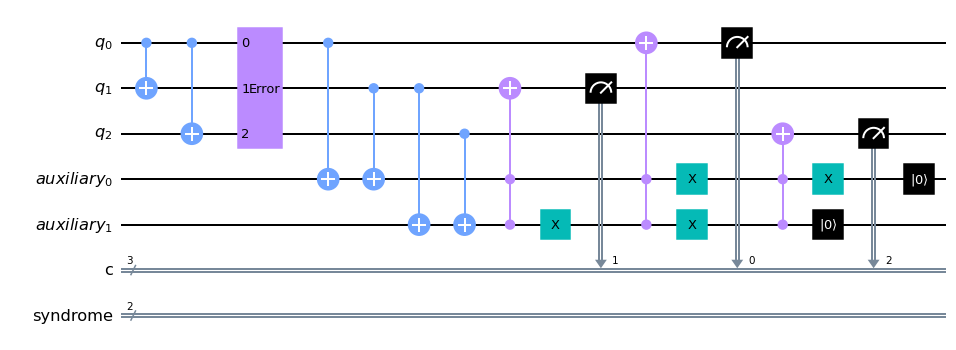

In [25]:
# Let's correct the error
# Apply the decoder
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc_3qx = QuantumCircuit(qreg_q, creg_c)
### your code goes here. ###
qc_3qx.cx(qreg_q[0], qreg_q[1])
qc_3qx.cx(qreg_q[0], qreg_q[2])

err, which_qubit = apply_err(3, 'bit')
qc_3qx.append(err,range(3))
qc_3qx.add_register(QuantumRegister(2, 'auxiliary'))
qc_3qx.add_register(ClassicalRegister(2, 'syndrome'))
qc_3qx.cx(0,3)
qc_3qx.cx(1,3)

qc_3qx.cx(1,4)
qc_3qx.cx(2,4)

#qc_3qx.measure([3,4],[3,4])


qc_3qx.ccx(3,4,1)
# negative control CCX gate
qc_3qx.x(4)
qc_3qx.ccx(3,4,0)
qc_3qx.x(4)
# negative control CCX gate
qc_3qx.x(3)
qc_3qx.ccx(3,4,2)
qc_3qx.x(3)

# reset the auxiliary bits
qc_3qx.reset(3)
qc_3qx.reset(4)
qc_3qx.measure([0,1,2],[0,1,2])
qc_3qx.draw('mpl')

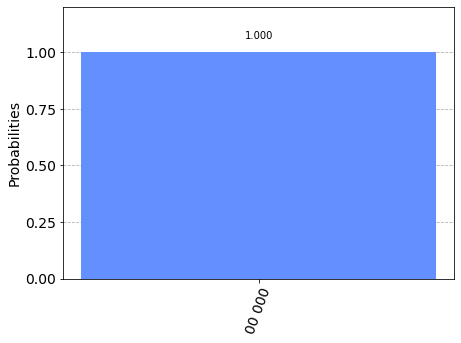

In [26]:
qc_3qx_trans = transpile(qc_3qx, sim)
counts = sim.run(qc_3qx_trans).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [ ]:
# Thus error is corrected